# Example Usage

Here is a demonstartion of the potential usage of ```GOBLIN lite```.


## Imports

Firstly, we start of by importing the relevant classes from the toolkit. 


In [1]:
import os
from IPython.display import Image

from goblin_lite.goblin import ScenarioRunner
from goblin_lite.data_grapher import DataGrapher
from goblin_lite.data_fetcher import DataFetcher
import shutil
import os


import warnings

# Filter out the RuntimeWarning related to unsupported linux distribution
warnings.filterwarnings("ignore", message="unsupported linux distribution:", category=RuntimeWarning)


The ```ScenarioRunner``` class is basically used to set to run the scenarios based on the configuration files for goblin and the CBM CFS3.

The ```DataFetcher``` class is used to retrieve the various results as dataframes from the scenario run. Each of the methods in the ```DataFetcher``` class relates to specific table. 

The ```DataGrapher``` class is still being developed, but contains some basic plotting to assist the user in visualising the results tables. 


## The Scenario Runner

In the first example below, we will set the path to the configurations, define the emissions factor country and the base and target year. Finally, we will create a directory for our outputs

In [2]:
#configuration 

goblin_config = "../src/tests/data/config.json" #location of test goblin configuration 

cbm_config = "../src/tests/data/cbm_factory.yaml" #location of test cbm configuration

ef_country = "ireland" #emissions factor country

#years for the baseline, and the target year 
baseline_year = 2020
target_year = 2050

#Make directory to store exported file

os.mkdir("jupyter_example")

data_path = "./jupyter_example/"


### Define classes and Run Scenarios

In [3]:
#class instances
runner_class = ScenarioRunner(ef_country, baseline_year,target_year, goblin_config, cbm_config)
graph_class = DataGrapher()
fetcher_class = DataFetcher()

In [4]:
#Run Scenarios 
runner_class.run_scenarios()


Existing tables have been deleted.
... calibration year not present, 2015 default year used for NFS system proportions: Dairy
... calibration year not present, 2015 default year used for NFS system proportions: Beef
... calibration year not present, 2015 default year used for NFS system proportions: Sheep
... calibration year not present, 2015 default year used for NFS system proportions: Dairy
... calibration year not present, 2015 default year used for NFS system proportions: Beef
... calibration year not present, 2015 default year used for NFS system proportions: Sheep
... calibration year not present, 2015 default year used for NFS system proportions: Dairy
... calibration year not present, 2015 default year used for NFS system proportions: Beef
... calibration year not present, 2015 default year used for NFS system proportions: Sheep
... calibration year not present, 2015 default year used for NFS system proportions: Dairy
... calibration year not present, 2015 default year used f

If the calibration year is not present for a specific dataset, the default year of 2015 is used.

## The Data Fetcher

The Scenario Run is now complete, and we can use the ```DataFectcher``` class to retrieve our data. 

**Note:** Once a scenario run is complete, when the user again runs scenarios, table output from the previous run is completely deleted. 

Here we will retrieve data for: 

    - Livestock outputs 
    - Aggregated emissions
    - Animal emissions by category 
    - Land use emissions by category 
    - Crop emissions by category 
    - Forest carbon flux 
    
These are not the only potential returns, as there are several additional methods returning results out.
Please consult the documentation for further details.

In [5]:
#Livestock outputs 

animal_output_df = fetcher_class.get_livestock_output_summary()

print(animal_output_df)

# baseline is index -1 

       Scenarios  total_milk_kg  total_beef_kg
index                                         
-1.0        -1.0   8.251443e+09   6.528033e+08
 0.0         0.0   6.895653e+09   6.269347e+08
 1.0         1.0   6.895653e+09   6.269347e+08


In [6]:
#Aggregated emissions

aggregated_emmissions_df = fetcher_class.get_climate_change_emission_totals()

print(aggregated_emmissions_df)

# baseline is index -1 

              CH4        N2O           CO2          CO2e
index                                                   
-1     536.084138  24.819686  10092.888756  31680.461352
 0     502.324394  20.579959  10082.576938  29601.349051
 1     502.324394  20.579959  10082.576938  29601.349051


In [7]:
#Animal emissions by category

animal_emissions_df = fetcher_class.get_climate_change_animal_emissions_by_category()

print(animal_emissions_df)

# baseline is index -1 

       enteric_ch4  manure_management_N2O  manure_management_CH4  \
index                                                              
-1      473.049267               2.818218              47.351487   
 0      444.435411               2.566116              42.200710   
 1      444.435411               2.566116              42.200710   

       manure_applied_N  N_direct_PRP  N_indirect_PRP  N_direct_fertiliser  \
index                                                                        
-1             1.077708      4.889341        0.805774             7.244295   
 0             0.980654      4.471997        0.736788             4.263050   
 1             0.980654      4.471997        0.736788             4.263050   

       N_indirect_fertiliser  soils_CO2  soil_organic_N_direct  \
index                                                            
-1                  0.998267  28.305200               5.967050   
 0                  0.587450  16.656761               5.452651   
 1  

In [8]:
#Land use emissions by category 

land_emissions_df = fetcher_class.get_landuse_emissions_totals()

print(land_emissions_df)

# baseline is index -1 

           land_use  year           CO2           CH4           N2O  \
scenario                                                              
-1         cropland  2020      0.000000  1.542857e-07  4.000000e-09   
-1        grassland  2020   6117.745007  8.917986e+00  2.126023e+00   
-1           forest  2020   3980.333699  3.315404e+00  6.892956e-01   
-1          wetland  2020   2233.286075  3.449994e+00  5.858179e-02   
-1            total  2020  10058.417268  1.568338e+01  2.873901e+00   
 0         cropland  2050      0.000000  1.542857e-07  4.000000e-09   
 0        grassland  2050   6117.350444  8.917689e+00  2.113557e+00   
 0           forest  2050   -592.672720  3.320590e+00  6.895825e-01   
 0          wetland  2050   2047.184751  3.449994e+00  5.858179e-02   
 0            total  2050  10059.753889  1.568827e+01  2.861721e+00   
 1         cropland  2050      0.000000  1.542857e-07  4.000000e-09   
 1        grassland  2050   6117.350444  8.917689e+00  2.113557e+00   
 1    

In [9]:
# Crop emissions by category 

crop_emissions_df= fetcher_class.get_climate_change_crop_emissions_by_category()

print(crop_emissions_df)

# baseline is index -1 

       crop_residue_direct  N_direct_fertiliser  N_indirect_fertiliser  \
index                                                                    
-1                3.529468             0.491902               0.090813   
 0                3.529468             0.491902               0.090813   
 1                3.529468             0.491902               0.090813   

       soils_CO2  soils_N2O  
index                        
-1      6.166289   4.112183  
 0      6.166289   4.112183  
 1      6.166289   4.112183  


In [10]:
#Forest carbon flux 

forest_flux_df = fetcher_class.get_forest_flux()

print(forest_flux_df)

# baseline is index -1 

       Year       Biomass            DOM  Total Ecosystem            HWP  \
index                                                                      
0      2008 -1.295620e+06  748176.209504    -5.474439e+05  198990.354181   
1      2009 -1.273156e+06  693542.337214    -5.796141e+05  166235.952388   
2      2010 -1.263766e+06  619887.050711    -6.438793e+05  170562.148490   
3      2011 -1.293139e+06  554212.779401    -7.389262e+05  174806.680165   
4      2012 -1.332425e+06  494282.964735    -8.381423e+05  177483.967611   
...     ...           ...            ...              ...            ...   
214    2076 -2.533094e+06 -449367.693963    -2.982462e+06       0.000000   
215    2077 -2.528505e+06 -481697.711067    -3.010202e+06       0.000000   
216    2078 -2.413377e+06 -509443.335110    -2.922820e+06       0.000000   
217    2079 -2.370209e+06 -532776.321815    -2.902985e+06       0.000000   
218    2080 -2.330316e+06 -553575.087277    -2.883891e+06       0.000000   

       Scen

These are simple examples, additional information on inputs and outputs can be retrieved. Furhter impact categories related to eutrophication and air quality are also available.

## DataGrapher 

The data grapher allows the user to plot some of the data from the generated tables

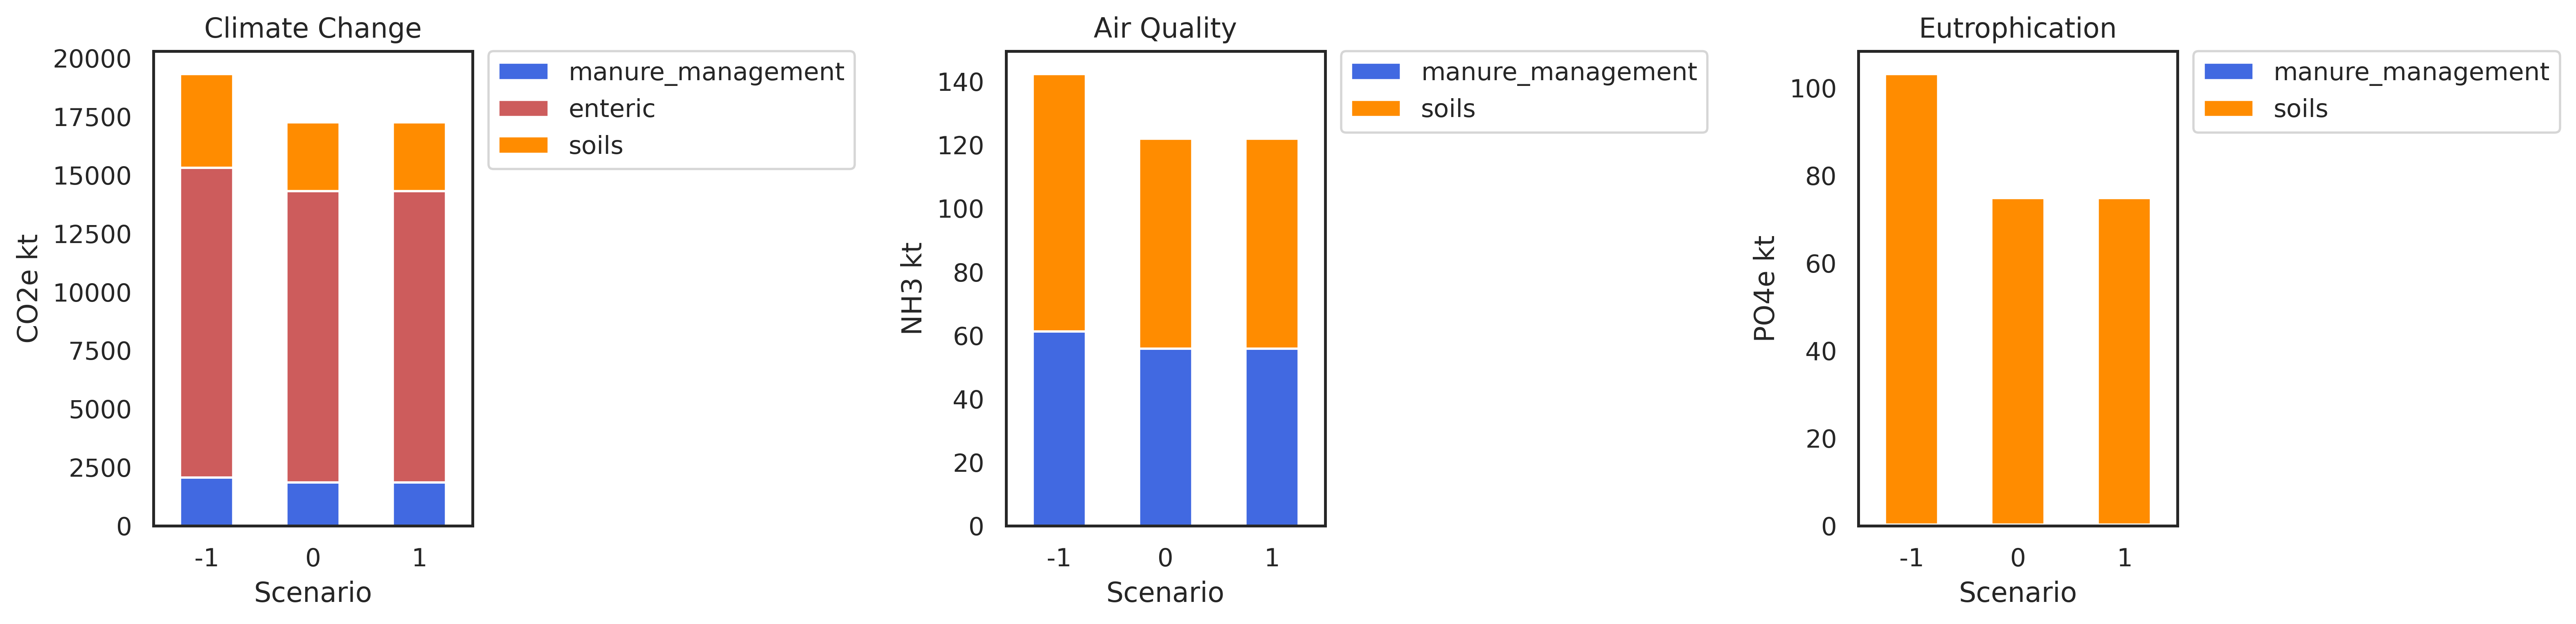

In [11]:
#save image
graph_class.plot_animal_lca_emissions_by_category(data_path)

#retrieve an display
image_path = os.path.join(data_path,"Livestock_LCA.png")

# display the image
Image(filename=image_path)


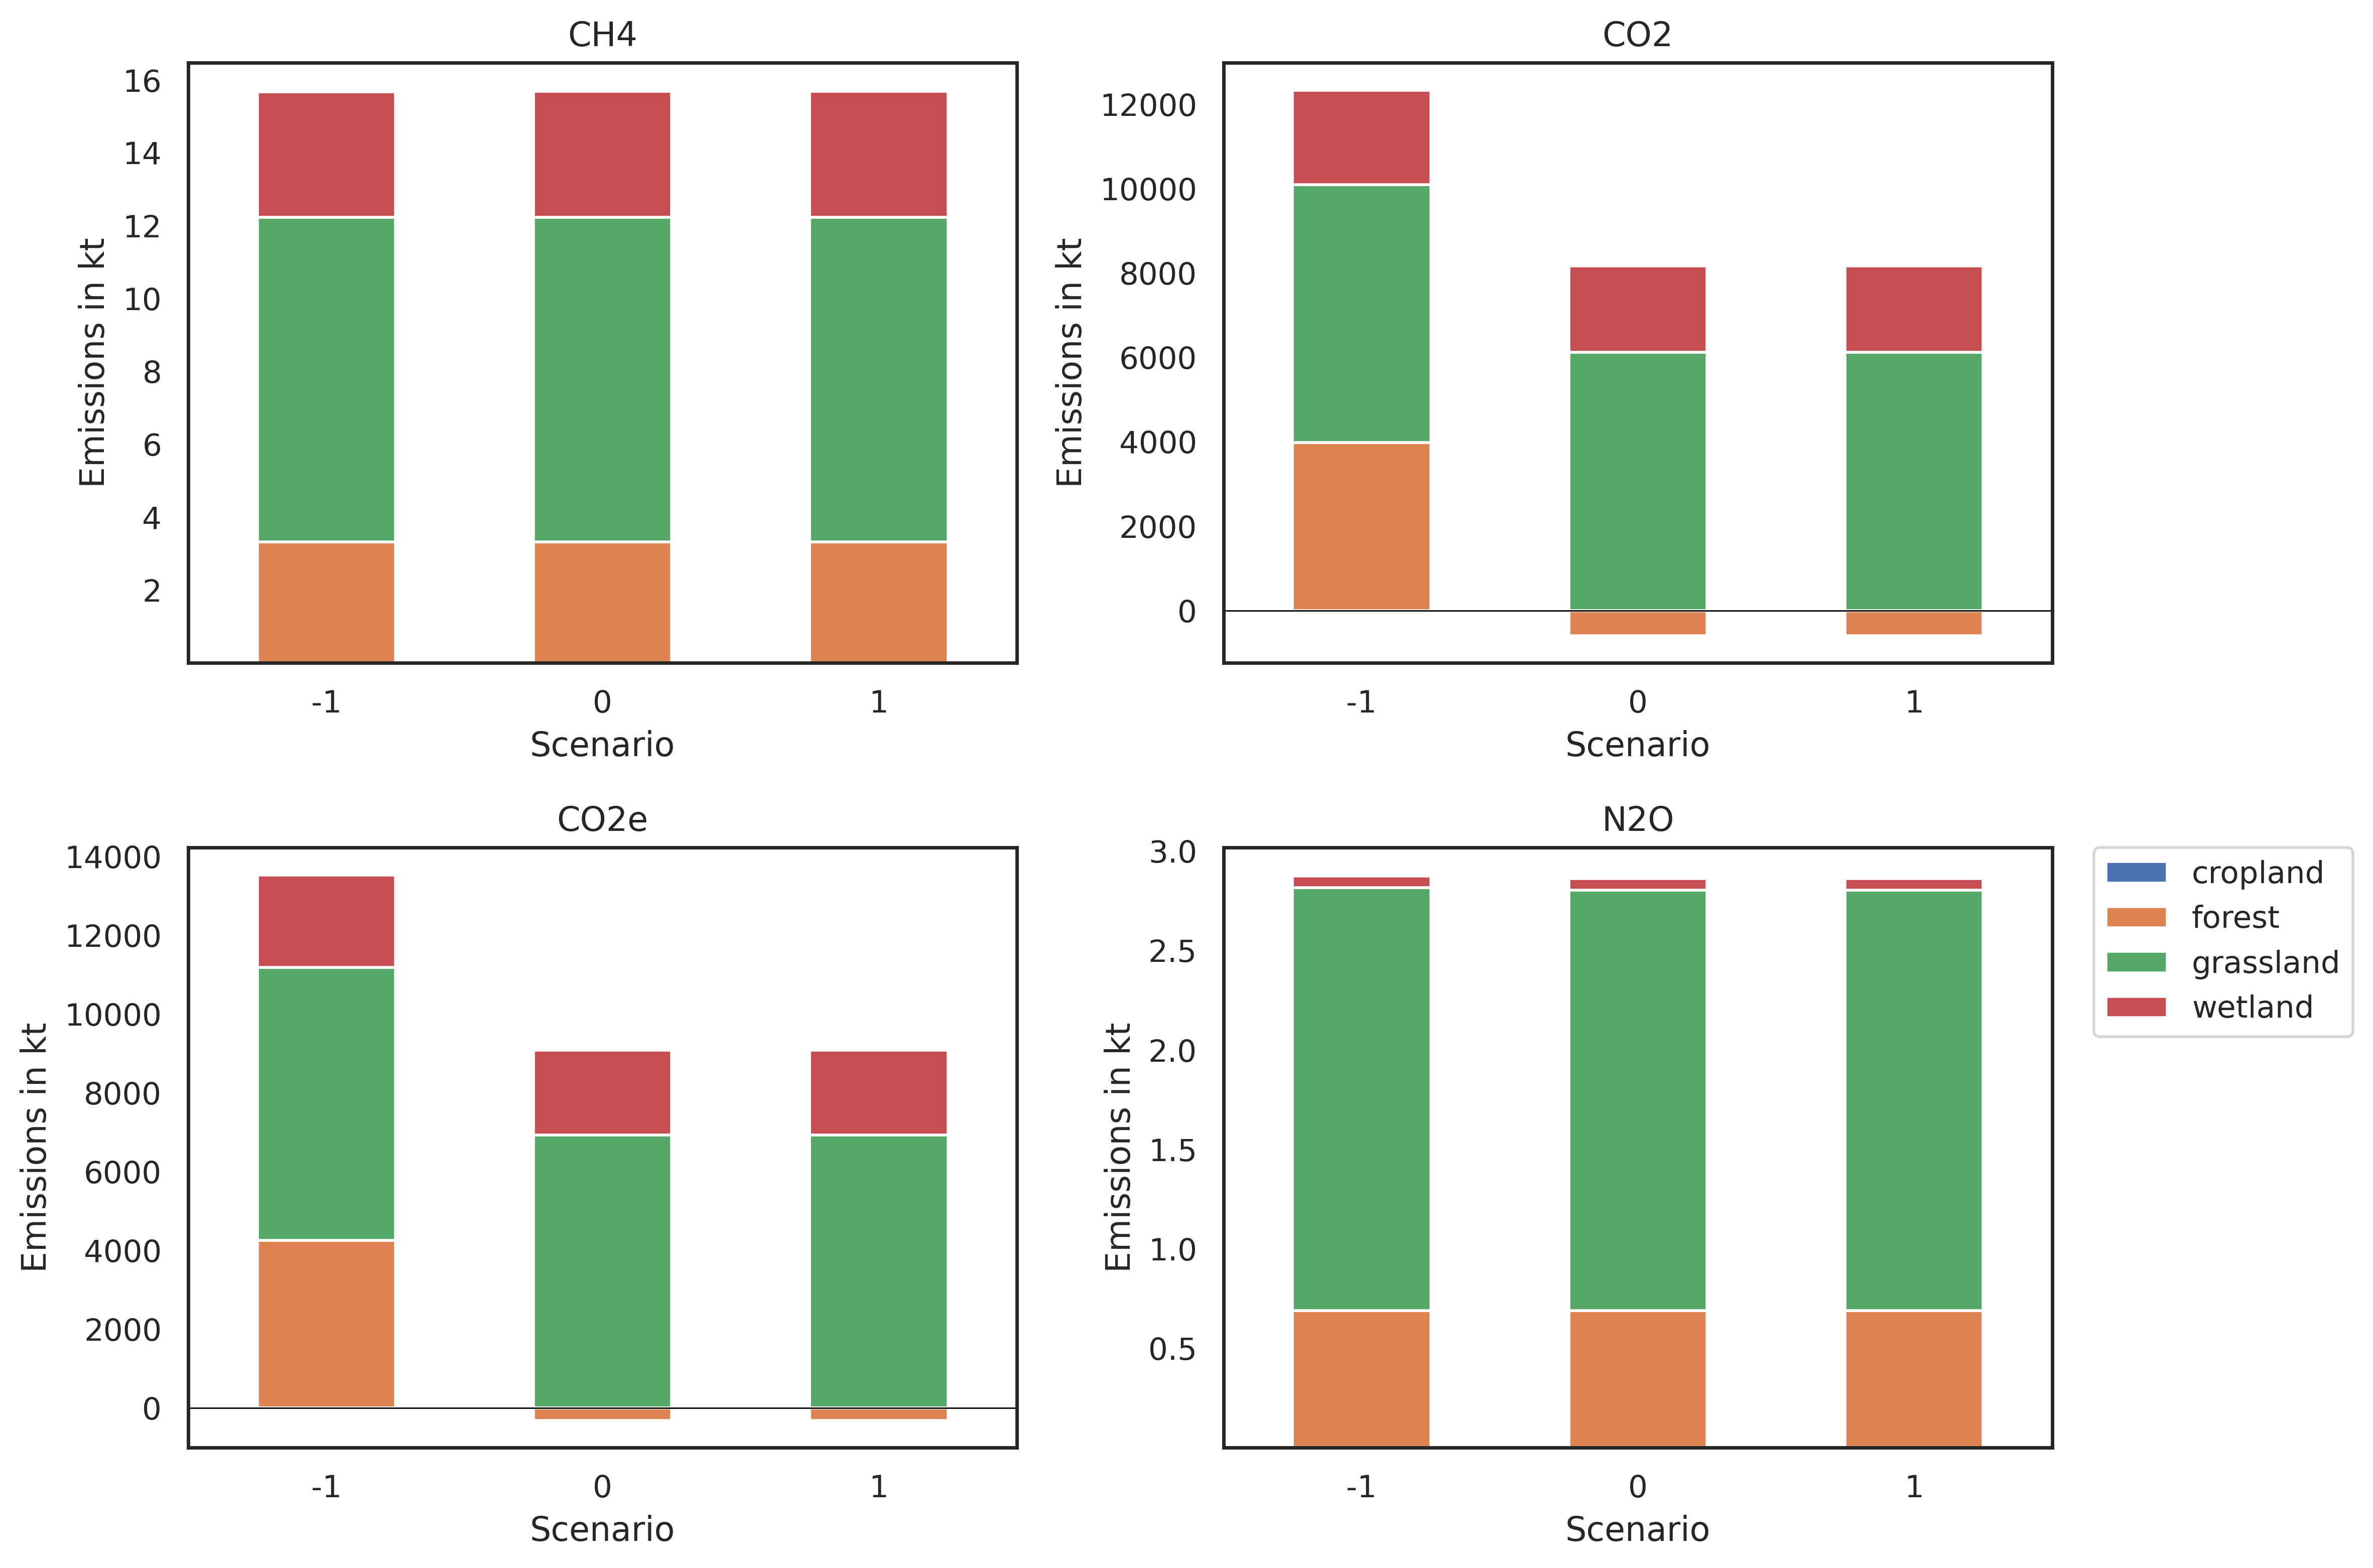

In [12]:
#Land use emissions

graph_class.plot_land_use_emissions(data_path)

#retrieve an display
image_path = os.path.join(data_path,"climate_change_land_use.png")

# display the image
Image(filename=image_path)

In [13]:
# Remove Generated files 

for filename in os.listdir(data_path):
    file_path = os.path.join(data_path, filename)
    try:
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Deleted file: {file_path}")
    except Exception as e:
        print(f"Error deleting file: {file_path}. Reason: {e}")
        
#Remove direcotry 
os.rmdir(data_path)

Deleted file: ./jupyter_example/Livestock_LCA.png
Deleted file: ./jupyter_example/climate_change_land_use.png
